<a href="https://colab.research.google.com/github/EsmaeilNarimissa/RAG-Retrieval-Analysis/blob/main/RAG_Document_Splitting_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Set up the environment

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
MODEL = "gpt-3.5-turbo"
# MODEL = "gpt-4-32k-0613"
PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")


# 2. Load and preprocess the PDF documents

In [ ]:
from PyPDF2 import PdfReader

def load_pdf_text(file_path):
    reader = PdfReader(file_path)
    text = ''
    for page in reader.pages:
        text += page.extract_text() + ' '
    return text

# Load texts from the PDFs
textbook_doc = load_pdf_text(r"C:\Users\Essi_ASUS_STRIX\Desktop\Jupyter-notebooks\RAG\Santiago\PDFs\Transformers.pdf")
journal_article_doc = load_pdf_text(r"C:\Users\Essi_ASUS_STRIX\Desktop\Jupyter-notebooks\RAG\Santiago\PDFs\JoR-Review-2019.pdf")
novel_doc = load_pdf_text(r"C:\Users\Essi_ASUS_STRIX\Desktop\Jupyter-notebooks\RAG\Santiago\PDFs\war-and-peace.pdf")

# 3. Split the Documents into Chunks

## 3.1 RecursiveCharacterTextSplitter

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Initialize the text splitter with desired chunk size and overlap
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)

# Assuming you have a list of strings representing the text content of each document
documents = [textbook_doc, journal_article_doc, novel_doc]

# Use the `create_documents` method to split each document into text_chunks, accumulating all token chunks.
all_chunks = []
for doc in documents:
    all_chunks.extend(text_splitter.create_documents([doc]))


# Split each document into text_chunks separately
textbook_chunks = text_splitter.create_documents([textbook_doc])
article_chunks = text_splitter.create_documents([journal_article_doc])
novel_chunks = text_splitter.create_documents([novel_doc])

## 3.2 TokenTextSplitter

In [ ]:
from langchain.text_splitter import TokenTextSplitter

# Initialize a token-based text splitter with specific chunk size and overlap.
token_splitter = TokenTextSplitter(chunk_size=1000, chunk_overlap=200, allowed_special={'<|endoftext|>'})

# List of document texts to be processed.
documents = [textbook_doc, journal_article_doc, novel_doc]

# Split each document into token_chunks based on token count, accumulating all token chunks.
all_token_chunks = []
for doc_text in documents:
    # Split the document text into token-based chunks and add them to the token_chunks list.
    all_token_chunks.extend(token_splitter.split_text(doc_text))

# Split each document into token_chunks separately
textbook_token_chunks = token_splitter.split_text(textbook_doc)
article_token_chunks = token_splitter.split_text(journal_article_doc)
novel_token_chunks = token_splitter.split_text(novel_doc)

# 4. Generate Embeddings

## 4.1 Attributes and Methods of Chuncked Documents

In [ ]:
# List of your chunked document lists
chunked_documents_lists = [
    textbook_chunks,
    article_chunks,
    novel_chunks,
    textbook_token_chunks,
    article_token_chunks,
    novel_token_chunks
]

# Names of the document lists for printing purposes
document_names = [
    "Textbook Chunks",
    "Article Chunks",
    "Novel Chunks",
    "Textbook Token Chunks",
    "Article Token Chunks",
    "Novel Token Chunks"
]

# Iterate over each list and print the attributes and methods of the first document
for doc_list, name in zip(chunked_documents_lists, document_names):
    if doc_list:  # Check if the list is not empty
        print(f"Attributes and methods of the first document in {name}:")
        print(dir(doc_list[0]))
        print("\n" + "-"*50 + "\n")  # Print a separator for readability
    else:
        print(f"{name} is empty.")
        print("\n" + "-"*50 + "\n")


Attributes and methods of the first document in Textbook Chunks:
['Config', '__abstractmethods__', '__annotations__', '__class__', '__class_vars__', '__config__', '__custom_root_type__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__exclude_fields__', '__fields__', '__fields_set__', '__format__', '__ge__', '__get_validators__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__include_fields__', '__init__', '__init_subclass__', '__iter__', '__json_encoder__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__post_root_validators__', '__pre_root_validators__', '__pretty__', '__private_attributes__', '__reduce__', '__reduce_ex__', '__repr__', '__repr_args__', '__repr_name__', '__repr_str__', '__rich_repr__', '__schema_cache__', '__setattr__', '__setstate__', '__signature__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__try_update_forward_refs__', '__validators__', '_abc_impl', '_calculate_keys', '_copy_and_set_values', '_decompose_class'

## 4.3 OpenAI Embedding model="text-embedding-3-small"

In [ ]:
from langchain_openai.embeddings import OpenAIEmbeddings

# Initialize the embeddings with the specified model
# Allow the <|endoftext|> token as a special token
embeddings = OpenAIEmbeddings(model="text-embedding-3-small", allowed_special={'<|endoftext|>'})

# Extract all methods of "text-embedding-3-small" for problem fixing
print(dir(embeddings))

['Config', '__abstractmethods__', '__annotations__', '__class__', '__class_vars__', '__config__', '__custom_root_type__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__exclude_fields__', '__fields__', '__fields_set__', '__format__', '__ge__', '__get_validators__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__include_fields__', '__init__', '__init_subclass__', '__iter__', '__json_encoder__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__post_root_validators__', '__pre_root_validators__', '__pretty__', '__private_attributes__', '__reduce__', '__reduce_ex__', '__repr__', '__repr_args__', '__repr_name__', '__repr_str__', '__rich_repr__', '__schema_cache__', '__setattr__', '__setstate__', '__signature__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__try_update_forward_refs__', '__validators__', '__weakref__', '_abc_impl', '_aget_len_safe_embeddings', '_calculate_keys', '_copy_and_set_values', '_decompose_class', '_enforce_dict_if_r

### 4.3.1 Test "text-embedding-3-small" model

In [ ]:
%%script echo Preventing cell execution
# This cell magic prevents the execution of the cell's content by redirecting it to the 'echo' command,
# which simply prints the text and does not execute the code.


embedded_query = embeddings.embed_query("Who is Mary's sister?")

print(f"Embedding length: {len(embedded_query)}")
print(embedded_query[:10])

Couldn't find program: 'echo'


# 5. Pinecone + Embedding

In [ ]:
%%script echo Preventing cell execution
# This cell magic prevents the execution of the cell's content by redirecting it to the 'echo' command,
# which simply prints the text and does not execute the code.

import os
from langchain_pinecone import PineconeVectorStore
from pinecone import Pinecone, ServerlessSpec

# Initialize Pinecone with your API key
pc = Pinecone(api_key=os.getenv("PINECONE_API_KEY"))

# Define your index names
index_names = [
    "textbook-chunks",
    "article-chunks",
    "novel-chunks",
    "textbook-token-chunks",
    "article-token-chunks",
    "novel-token-chunks"
]

# Create serverless indexes
for index_name in index_names:
    if index_name not in pc.list_indexes().names():
        pc.create_index(
            name=index_name,
            dimension=1536,
            metric="cosine",
            spec=ServerlessSpec(cloud='aws', region='us-west-2')
        )

    ## Create PineconeVectorStores from documents
textbook_chunks_vectorstore = PineconeVectorStore.from_documents(
    textbook_chunks, embeddings, index_name="textbook-chunks"
)
article_chunks_vectorstore = PineconeVectorStore.from_documents(
    article_chunks, embeddings, index_name="article-chunks"
)
novel_chunks_vectorstore = PineconeVectorStore.from_documents(
    novel_chunks, embeddings, index_name="novel-chunks"
)

# Use from_texts() method instead, which accepts a list of strings directly
textbook_token_chunks_vectorstore = PineconeVectorStore.from_texts(
    textbook_token_chunks,
    embeddings,
    index_name="textbook-token-chunks"
)
article_token_chunks_vectorstore = PineconeVectorStore.from_texts(
    article_token_chunks,
    embeddings,
    index_name="article-token-chunks"
)
novel_token_chunks_vectorstore = PineconeVectorStore.from_texts(
    novel_token_chunks,
    embeddings,
    index_name="novel-token-chunks"
)

Couldn't find program: 'echo'


In [ ]:
from langchain_pinecone import PineconeVectorStore
from pinecone import Pinecone, ServerlessSpec

# Create an instance of the Pinecone class
pc = Pinecone(api_key=os.getenv("PINECONE_API_KEY"))

# List all indexes to confirm their names and availability
all_indexes = pc.list_indexes()
print("Available indexes:", all_indexes.names())


c:\Users\Essi_ASUS_STRIX\anaconda3\envs\Santiago_RAG\lib\site-packages\pinecone\data\index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


Available indexes: ['learner-guides-1', 'article-chunks', 'article-token-chunks', 'textbook-token-chunks', 'dl-ai-sdit1gl9t3blbkfjce2yw41ltwza60mzcuzh', 'novel-chunks', 'novel-token-chunks', 'flowise', 'textbook-chunks', 'tax-legislation-1997']


# 6. LM Studio Q&As generation for evaluation

`Overview`

This script generates a specified number of questions and answers from chunks of text using a natural language processing model hosted on a local LM Studio server. The output is then organized and saved into an Excel file.

`Details`


1. **Function Definition: `generate_qa`**
   - **Purpose**: Generates questions and answers from a given text chunk.
   - **Parameters**:
     - `chunk`: The text segment from which to generate questions and answers.
     - `num_questions`: The number of question-answer pairs to generate.
   - **Process**:
     - Constructs a prompt specifying the number of questions and appends it to the input text chunk.
     - Calls the model to generate responses based on this prompt.
     - Extracts and splits the response into separate question-answer pairs.
     - Returns a list of dictionaries, each containing a question and its corresponding answer.

2. **Example Usage**
   - Generates data for different types of text sources (e.g., textbook chunks, article chunks, novel chunks) by:
     - Selecting indices to evenly distribute the generation across the chunks.
     - Generating question-answer pairs for each selected chunk.
     - Collecting these pairs into a list, `eval_data`.

3. **Excel Output**
   - Initializes a new Excel workbook and selects the active sheet.
   - Writes column headers and data rows based on the `eval_data` list.
   - Saves the workbook as "eval_ds.xlsx".

`Execution Flow`

- The script executes a series of data generation tasks for various text chunk categories (textbook, article, novel).
- It processes each category by generating a predefined number of question-answer pairs.
- All generated data is compiled into an Excel file for review or further analysis.


In [ ]:
%%script echo Preventing cell execution
# This cell magic prevents the execution of the cell's content by redirecting it to the 'echo' command,
# which simply prints the text and does not execute the code.


from openai import OpenAI
from openpyxl import Workbook

# Point to the local server
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

# Function to generate questions and answers from a document chunk
def generate_qa(chunk, num_questions):
    prompt = f"Generate {num_questions} questions and answers based on the following document chunk:\n\n{chunk}\n\nQuestions and Answers:"
    response = client.completions.create(
        model="TheBloke/dolphin-2.6-mistral-7B-GGUF/dolphin-2.6-mistral-7b.Q8_0.gguf",
        prompt=prompt,
        max_tokens=1000,  # Set max_tokens to match the chunk_size in Sections 3.1 & 3.2!
        n=1,  # Generate one set of questions and answers
        stop=None,
        temperature=0.2,
    )
    qa_text = response.choices[0].text.strip()
    qa_pairs = qa_text.split("\n\n")
    qa_data = []
    for pair in qa_pairs:
        lines = pair.split("\n")
        if len(lines) >= 2:
            question = lines[0].strip()
            answer = " ".join(lines[1:]).strip()
            qa_data.append({"question": question, "answer": answer})
    return qa_data[:num_questions]  # Limit the number of questions and answers to num_questions

# Example usage
num_questions = 50
eval_data = []

# Generate questions and answers for textbook chunks
selected_indices = [i * (len(textbook_chunks) // num_questions) for i in range(num_questions)]
for i in selected_indices:
    chunk_qa = generate_qa(textbook_chunks[i].page_content, 1)
    for qa in chunk_qa:
        eval_data.append({"source": f"Textbook Chunk {i+1}", "question": qa["question"], "correct_answer": qa["answer"]})

# Generate questions and answers for textbook token chunks
selected_indices = [i * (len(textbook_token_chunks) // num_questions) for i in range(num_questions)]
for i in selected_indices:
    chunk_qa = generate_qa(textbook_token_chunks[i], 1)  # Pass the token chunk directly
    for qa in chunk_qa:
        eval_data.append({"source": f"Textbook Token Chunk {i+1}", "question": qa["question"], "correct_answer": qa["answer"]})

# Generate questions and answers for article chunks
selected_indices = [i * (len(article_chunks) // num_questions) for i in range(num_questions)]
for i in selected_indices:
    chunk_qa = generate_qa(article_chunks[i].page_content, 1)
    for qa in chunk_qa:
        eval_data.append({"source": f"Article Chunk {i+1}", "question": qa["question"], "correct_answer": qa["answer"]})

# Generate questions and answers for article token chunks
selected_indices = [i * (len(article_token_chunks) // num_questions) for i in range(num_questions)]
for i in selected_indices:
    chunk_qa = generate_qa(article_token_chunks[i], 1)  # Pass the token chunk directly
    for qa in chunk_qa:
        eval_data.append({"source": f"Article Token Chunk {i+1}", "question": qa["question"], "correct_answer": qa["answer"]})

# Generate questions and answers for novel chunks
selected_indices = [i * (len(novel_chunks) // num_questions) for i in range(num_questions)]
for i in selected_indices:
    chunk_qa = generate_qa(novel_chunks[i].page_content, 1)
    for qa in chunk_qa:
        eval_data.append({"source": f"Novel Chunk {i+1}", "question": qa["question"], "correct_answer": qa["answer"]})

# Generate questions and answers for novel token chunks
selected_indices = [i * (len(novel_token_chunks) // num_questions) for i in range(num_questions)]
for i in selected_indices:
    chunk_qa = generate_qa(novel_token_chunks[i], 1)  # Pass the token chunk directly
    for qa in chunk_qa:
        eval_data.append({"source": f"Novel Token Chunk {i+1}", "question": qa["question"], "correct_answer": qa["answer"]})


# Create a new workbook and select the active sheet
workbook = Workbook()
sheet = workbook.active

# Write the headers
sheet.append(["source", "question", "correct_answer"])

# Write the data rows
for entry in eval_data:
    sheet.append([entry["source"], entry["question"], entry["correct_answer"]])

# Save the workbook
workbook.save("eval_ds.xlsx")

Couldn't find program: 'echo'


# 7. Retrival: OpenAI+LMS Retrival on All Indexes in Pinecone

## 7.1 Index Properties

In [ ]:
import numpy as np
import os
import pandas as pd
import pinecone
from langchain_openai.embeddings import OpenAIEmbeddings
from pinecone import Pinecone, ServerlessSpec
from dotenv import load_dotenv
import os

load_dotenv()
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
MODEL = "gpt-3.5-turbo"
# MODEL = "gpt-4-32k-0613"
PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")

# Initialize Pinecone
pc = pinecone.Pinecone(api_key=os.getenv("PINECONE_API_KEY"))


# Index mapping details
index_names = [
    "textbook-chunks",
    "article-chunks",
    "novel-chunks",
    "textbook-token-chunks",
    "article-token-chunks",
    "novel-token-chunks"
]
index_hosts = [
    "https://textbook-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io",
    "https://article-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io",
    "https://novel-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io",
    "https://textbook-token-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io",
    "https://article-token-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io",
    "https://novel-token-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io"
]

c:\Users\Essi_ASUS_STRIX\anaconda3\envs\Santiago_RAG\lib\site-packages\pinecone\data\index.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


## 7.2 OpenAI Retrieval: "text-embedding-3-small" model

In [ ]:
import numpy as np
import pandas as pd
import pinecone
from langchain_openai.embeddings import OpenAIEmbeddings
from pinecone import Pinecone, ServerlessSpec
import re  # Import regex for processing

# Initialize Pinecone
pc = pinecone.Pinecone(api_key=os.getenv("PINECONE_API_KEY"))

# Load dataset
df = pd.read_excel("eval_ds.xlsx")

# Initialize embeddings
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

# Define a mapping from source description to index names and their hosts
index_mapping = {
    "textbook chunk": ("textbook-chunks", "https://textbook-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io"),
    "article chunk": ("article-chunks", "https://article-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io"),
    "novel chunk": ("novel-chunks", "https://novel-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io"),
    "textbook token chunk": ("textbook-token-chunks", "https://textbook-token-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io"),
    "article token chunk": ("article-token-chunks", "https://article-token-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io"),
    "novel token chunk": ("novel-token-chunks", "https://novel-token-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io")
}

# Retrieve answers for each question
retrieved_answers = []
for _, row in df.iterrows():
    # Normalize source to lower case and remove numbers
    source_key = re.sub(r' \d+', '', row['source']).lower().strip()  # Remove numbers and strip spaces
    mapping_info = index_mapping.get(source_key, None)

    if mapping_info is None:
        retrieved_answer = "No matching index found"
    else:
        index_name, host_url = mapping_info
        index = pc.Index(index_name, host_url)
        query = row['question']
        query_vector = embeddings.embed_query(query)
        query_vector = np.array(query_vector)
        query_vector /= np.linalg.norm(query_vector)
        top_k = 1
        response = index.query(vector=query_vector.tolist(), top_k=top_k, include_metadata=True)
        retrieved_answer = response['matches'][0]['metadata'].get('text', 'No answer found') if response['matches'] else "No answer found"
    retrieved_answers.append(retrieved_answer)

# Add retrieved answers to DataFrame
df['OAI_retrieved_answer'] = retrieved_answers

# Save DataFrame back to Excel
df.to_excel("EN_Generated_DFs/eval_ds_updated_OAI.xlsx", index=False)


## 7.3 LMS Retrieval: "bge-large-en-v1.5-gguf" model

In [ ]:
import numpy as np
import pandas as pd
import pinecone
from openai import OpenAI
from langchain_openai.embeddings import OpenAIEmbeddings
from pinecone import Pinecone, ServerlessSpec
import re

# Initialize Pinecone
pc = pinecone.Pinecone(api_key=os.getenv("PINECONE_API_KEY"))

# Initialize LM Studio's OpenAI client
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

def get_embedding(text, model="CompendiumLabs/bge-large-en-v1.5-gguf"):
    text = text.replace("\n", " ")
    embedding = client.embeddings.create(input=[text], model=model).data[0].embedding
    required_dimension = 1536
    if len(embedding) < required_dimension:
        padding = [0] * (required_dimension - len(embedding))
        embedding += padding
    elif len(embedding) > required_dimension:
        embedding = embedding[:required_dimension]
    return np.array(embedding) / np.linalg.norm(embedding)

# Load dataset
df = pd.read_excel("EN_Generated_DFs/eval_ds_updated_OAI.xlsx")

# Define the index mapping explicitly to avoid errors
index_mapping = {
    "textbook chunk": ("textbook-chunks", "https://textbook-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io"),
    "article chunk": ("article-chunks", "https://article-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io"),
    "novel chunk": ("novel-chunks", "https://novel-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io"),
    "textbook token chunk": ("textbook-token-chunks", "https://textbook-token-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io"),
    "article token chunk": ("article-token-chunks", "https://article-token-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io"),
    "novel token chunk": ("novel-token-chunks", "https://novel-token-chunks-fwv23qf.svc.apw5-4e34-81fa.pinecone.io")
}

# Retrieve answers for each question
retrieved_answers = []
for _, row in df.iterrows():
    source_key = re.sub(r' \d+', '', row['source']).lower().strip()
    mapping_info = index_mapping.get(source_key, None)
    if mapping_info is None:
        retrieved_answer = "No matching index found"
    else:
        index_name, host_url = mapping_info
        index = pc.Index(index_name, host_url)
        query = row['question']
        query_vector = get_embedding(query)
        query_vector = np.array(query_vector)
        query_vector /= np.linalg.norm(query_vector)
        top_k = 1
        response = index.query(vector=query_vector.tolist(), top_k=top_k, include_metadata=True)
        retrieved_answer = response['matches'][0]['metadata'].get('text', 'No answer found') if response['matches'] else "No answer found"
    retrieved_answers.append(retrieved_answer)

# Add retrieved answers to DataFrame
df['LMS_retrieved_answer'] = retrieved_answers

# Save DataFrame back to Excel
df.to_excel("EN_Generated_DFs/eval_ds_updated_OAI-LMS.xlsx", index=False)


# 8. Scoring the Retrived Answers

## 8.1 LLM-Based Evaluation: Best LM Studio

It does not work properly! The model needs to be `fine-tuned` to be able to give us the final score, only, in the right format without any extra words!

In [ ]:
%%script echo Preventing cell execution
# This cell magic prevents the execution of the cell's content by redirecting it to the 'echo' command,
# which simply prints the text and does not execute the code.


import pandas as pd
import re
from openai import OpenAI


# Define a function to normalize correct answers by removing prefixes
def normalize_answer(answer):
    # Define a list of patterns to remove from the start of the answers
    patterns = ['^A1:', '^A:', '^Answer:', '^-', '^\d+\.', '^\s+']
    for pattern in patterns:
        answer = re.sub(pattern, '', answer).strip()
    return answer


# Assuming the evaluation function and the normalize_answer function are already defined

# Load the Excel file into a DataFrame
questions_df = pd.read_excel('EN_Generated_DFs/eval_ds_updated_OAI-LMS.xlsx', sheet_name='Sheet1')


# Normalize the "correct_answer" column
questions_df['correct_answer'] = questions_df['correct_answer'].apply(normalize_answer)



# Define the evaluation function for LLM-based evaluation
client = OpenAI(base_url="http://localhost:1234/v1", api_key="your_api_key_here")

def evaluate_answer_llm(question, correct_answer, retrieved_answer):
    prompt = f"""
    Return a numerical score between 0 and 1 that represents the correctness and relevance of the following response to the question asked:
    Question: '{question}'
    Correct Answer: '{correct_answer}'
    Retrieved Answer: '{retrieved_answer}'
    """
    response = client.completions.create(
        model="lmstudio-community/Meta-Llama-3-8B-Instruct-GGUF/Meta-Llama-3-8B-Instruct-Q8_0.gguf",
        prompt=prompt,
        max_tokens=10,
        n=1,
        stop=None,
        temperature=0.1
    )
    evaluation_text = response.choices[0].text.strip()
    match = re.search(r"\b0\.\d+|\b1\.0\b", evaluation_text)
    if match:
        return float(match.group(0))
    return None

# Apply the evaluation function to each row in the DataFrame
questions_df['Eval_LLM_LMS'] = questions_df.apply(lambda row: evaluate_answer_llm(row['question'], row['correct_answer'], row['LMS_retrieved_answer']), axis=1)

questions_df['Eval_LLM_OAI'] = questions_df.apply(lambda row: evaluate_answer_llm(row['question'], row['correct_answer'], row['OAI_retrieved_answer']), axis=1)

# Save the updated DataFrame back to an Excel file
questions_df.to_excel('EN_Generated_DFs/eval_ds_updated_OAI-LMS_with_scores.xlsx', index=False)


## 8.2 Scripted Metrics-Based Evaluation

#### Evaluation Strategy for RAG Pipeline Answers

To assess the retrieved answers from your RAG pipeline against the correct answers provided in your dataset, a comprehensive approach using multiple metrics will provide a holistic understanding of answer quality.

##### Metrics Overview

1. **SequenceMatcher**:
   - Measures exact string matches between the generated response and the reference. Useful for checking literal accuracy or keyword matching in scenarios where specific terms or entities are critical.

2. **BLEU**:
   - Evaluates n-gram overlap, assessing fluency and syntactical correctness. Useful for surface linguistic quality but less effective for deep semantic understanding.

3. **METEOR**:
   - Combines precision and recall of unigrams and considers synonyms and stems. More aligned with human judgment, suitable for assessing meaningful content.

4. **BERT Score**:
   - Assesses contextual relationships between words using deep bidirectional representations. Highly relevant for evaluating semantic and contextual accuracy in responses.

##### Proposed Metric Weights Re-evaluation:
- **SequenceMatcher**: 0.30 - Higher weight to emphasize exact matches in wording, crucial for precise information retrieval and minimizing hallucinations.
- **BLEU**: 0.30 - Increased weight to stress the importance of literal accuracy in the output, essential for reliable information extraction.
- **METEOR**: 0.20 - Reduced weight, although it balances well between form and meaning, the emphasis shifts slightly towards exact wording.
- **BERT Score**: 0.20 - Reduced weight as it focuses more on semantic similarity which, while important, is less critical than ensuring factual accuracy and exact wording in RAG contexts.

This adjusted weighting scheme is designed to optimize the relevance and accuracy of the evaluation metrics to the specific needs of a RAG system, emphasizing precision in information retrieval to minimize errors and hallucinations in generated responses.


#### **Description of the Evaluation Script**

This Python script performs an automated evaluation of responses generated by a Retrieval-Augmented Generation (RAG) system. It utilizes a comprehensive evaluation pipeline comprising various NLP metrics to assess the quality of the generated responses compared to reference answers. The script includes the following key components and features:

- **Preprocessing**: Normalizes correct answers by removing common prefixes to ensure consistency in evaluation.
- **NLP Tools and Metrics**:
  - Utilizes `nltk` for tokenization and `sacrebleu` for BLEU scores, measuring the fluency based on n-gram overlap.
  - Applies `SequenceMatcher` to assess the literal similarity between the generated text and the reference.
  - Uses `meteor_score` from `nltk` to evaluate the semantic and syntactic similarity.
  - Leverages BERT-based embeddings (`BERTScore`) for a deep semantic comparison of responses, providing scores based on the contextual matching of tokens.
- **Logging**: Implements logging for tracking the evaluation process and capturing any errors or important events.
- **Error Handling**: Includes robust error handling to manage and log exceptions during the evaluation process.
- **Data Handling**: Loads data from an Excel file, applies the evaluation across responses, and outputs the results back into an updated Excel file.

The script is designed to be modular and is configured to suppress warnings and minimize output clutter, ensuring a focus on essential information. This setup is ideal for processing large datasets and generating comprehensive evaluations for refining RAG systems.



In [ ]:
import pandas as pd
import re
from difflib import SequenceMatcher
from nltk.tokenize import word_tokenize
import nltk
import sacrebleu
from nltk.translate.meteor_score import single_meteor_score
from transformers import AutoTokenizer, AutoModel, logging as transformers_logging
from bert_score import score as bert_score
import logging
import warnings

# Configure logging
logging.basicConfig(filename='evaluation.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Suppress warnings
warnings.filterwarnings("ignore")

# Suppress transformers logging
transformers_logging.set_verbosity_error()

# Define a function to normalize correct answers by removing prefixes
def normalize_answer(answer):
    # Define a list of patterns to remove from the start of the answers
    patterns = ['^A1:', '^A:', '^Answer:', '^-', '^\d+\.', '^\s+']
    for pattern in patterns:
        answer = re.sub(pattern, '', answer).strip()
    return answer

# Ensure necessary NLTK resources are downloaded
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('roberta-large')
model = AutoModel.from_pretrained('roberta-large', output_hidden_states=True)

def evaluate_answer(question, correct_answer, retrieved_answer):
    try:
        if not correct_answer or not retrieved_answer:
            return "Input strings must be non-empty."

        # Tokenize the reference and candidate sentences using the tokenizer
        tokenized_ref = tokenizer.tokenize(correct_answer)
        tokenized_cand = tokenizer.tokenize(retrieved_answer)

        if not tokenized_ref or not tokenized_cand:
            return None

        seq_matcher = SequenceMatcher(None, ' '.join(tokenized_cand), ' '.join(tokenized_ref))
        seq_score = seq_matcher.ratio()

        bleu_score = sacrebleu.corpus_bleu([' '.join(tokenized_cand)], [[' '.join(tokenized_ref)]]).score / 100.0

        meteor_score = single_meteor_score(tokenized_ref, tokenized_cand)

        # Convert token lists to string sentences
        ref_sentence = ' '.join(tokenized_ref)
        cand_sentence = ' '.join(tokenized_cand)

        # Compute BERTScore
        P, R, F1 = bert_score([cand_sentence], [ref_sentence], model_type='roberta-large')
        bert_score_val = F1.mean().item()
    except Exception as e:
        logging.error(f"Error processing question: {question}")
        logging.error(f"Error details: {str(e)}")
        return None

    logging.info(f"Evaluation completed for question: {question}")

    final_score = (seq_score * 0.3 + bleu_score * 0.3 + meteor_score * 0.2 + bert_score_val * 0.2)
    return {
        'SequenceMatcher': seq_score,
        'BLEU': bleu_score,
        'METEOR': meteor_score,
        'BERT Score': bert_score_val,
        'Final Average Score': final_score
    }

try:
    # Load the Excel file into a DataFrame
    questions_df = pd.read_excel('EN_Generated_DFs/eval_ds_updated_OAI-LMS.xlsx', sheet_name='Sheet1')

    # Apply the normalize_answer function to the 'correct_answer' column
    questions_df['correct_answer'] = questions_df['correct_answer'].apply(normalize_answer)

    # Apply the evaluation function to each row in the DataFrame for both LMS and OAI retrieved answers
    questions_df['Eval_Score_LMS'] = questions_df.apply(lambda row: evaluate_answer(row['question'], row['correct_answer'], row['LMS_retrieved_answer']), axis=1)
    questions_df['Eval_Score_OAI'] = questions_df.apply(lambda row: evaluate_answer(row['question'], row['correct_answer'], row['OAI_retrieved_answer']), axis=1)

    # Save the updated DataFrame back to an Excel file
    questions_df.to_excel('EN_Generated_DFs/eval_ds_updated_OAI-LMS_with_scores.xlsx', index=False)

    logging.info("Evaluation process completed successfully.")
except Exception as e:
    logging.error("An error occurred during the evaluation process.")
    logging.error(f"Error details: {str(e)}")

# 9. Exploratory Data Analysis (EDA)

## 9.1 Data Parsing and Preparation

In [ ]:
import pandas as pd
import io

# Load the dataset to examine its structure and summary
data_path = 'EN_Generated_DFs/eval_ds_updated_OAI-LMS_with_scores.xlsx'
data = pd.read_excel(data_path)

# Display the first few rows of the dataset and a summary description
data_head = data.head()
data_description = data.describe(include='all')

# Capture the info output using StringIO
buffer = io.StringIO()
data.info(buf=buffer)
data_info = buffer.getvalue()

# Combining all the information into one variable
msg_91 = f"Data Information:\n{data_info}"

# Printing the combined information
print(f"Data Head:\n{data_head}")
print(f"Data Head:\n{data_description}")
print(msg_91)


Data Head:
              source                                           question  \
0   Textbook Chunk 1  Q1: What is the main focus of "Transformers fo...   
1  Textbook Chunk 21  Q: What is the role of an Industry 4.0 AI spec...   
2  Textbook Chunk 41              A: The steps involved are as follows:   
3  Textbook Chunk 61  Q: What is the main focus of Chapter 14 in the...   
4  Textbook Chunk 81            Q1: What is the purpose of using Codex?   

                                      correct_answer  \
0  The main focus of "Transformers for Natural La...   
1  The role of an Industry 4.0 AI specialist invo...   
2  Installing the requirements (Step 3) 2. Checki...   
3  The main focus of Chapter 14 in the book is to...   
4  The purpose of using Codex is to automatically...   

                                OAI_retrieved_answer  \
0  Transformers for Natural \nLanguage Processing...   
1  The role of an Industry 4.0 AI specialist\nIn ...   
2  • Learn the many ways in which

### 9.1.1 LMS AI Agent Analysis of Section 9.1

In [ ]:
import pandas as pd
from openai import OpenAI
import re

# Initialize the client for your local LLM
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

def evaluate_answer_llm(system_prompt, user_prompt):
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
    ]

    response = client.chat.completions.create(
        model="MaziyarPanahi/Meta-Llama-3-8B-Instruct-GGUF/Meta-Llama-3-8B-Instruct.Q8_0.gguf",
        messages=messages,
        max_tokens=4000,  # Increased token count for detailed analysis
        n=1,
        stop=None,
        temperature=0.1
    )

    # Access the 'content' attribute of the 'message' object directly
    return response.choices[0].message.content.strip()

# System prompt instructs the LLM on the task
system_prompt = """
Role:
You are a statistician with expertise in data analysis. You talk in a concise and informative way!

Backstory:
Our research has focused on evaluating the performance of a
Retrieval-Augmented Generation (RAG) system across various document types,
including textbooks, articles, and novels. We utilized different document splitting methods—namely,
the Token-based Splitter and Recursive Character Splitter—to optimize text processing for retrieval tasks.
Additionally, we employed two advanced embedding generation techniques provided by OpenAI and LM Studio to assess their efficiency
and accuracy in matching queries with the relevant document chunks.
The only important evaluation scores here is:
"Final Average Score" in our "Eval_Score_LMS" (evaluation score when LM Studio embedding used)
and "Eval_Score_OAI" (evaluation score when OpenAI embedding used) columns!

Goal:
Your goal is to analyze the data provided below (Data Information and Data Description), identify significant patterns
or results from the data, and explain their implications clearly and concisely.
The analysis should help in understanding the effectiveness of
these methods and technologies in enhancing the accuracy and efficiency of information retrieval.

Data Overview:
{msg_91}
"""

# Prepare the user prompt with the data description and information
# Assume msg_91 is prepared earlier in the script and contains a formatted string of the data description
user_prompt = f"Data Overview:\n{msg_91}"

# Call the LLM to analyze and explain the data overview results
explanation = evaluate_answer_llm(system_prompt, user_prompt)
print(explanation)


Based on the provided data overview, I can see that we have a pandas DataFrame with 295 entries and 7 columns. The columns are:

1. `source`: an object column representing the source of the data.
2. `question`: an object column containing the questions being evaluated.
3. `correct_answer`: an object column holding the correct answers to the questions.
4. `OAI_retrieved_answer` and `LMS_retrieved_answer`: object columns storing the retrieved answers using OpenAI (OAI) and LM Studio (LMS) embeddings, respectively.
5. `Eval_Score_LMS` and `Eval_Score_OAI`: object columns containing the evaluation scores for LMS and OAI embeddings, respectively.

The data type of all columns is object, which suggests that they contain string or categorical values. The memory usage is approximately 16.3 KB.

To analyze this data, I would like to know more about the specific questions being evaluated, the types of documents used (textbooks, articles, novels), and the evaluation metrics used to calculate the 

In [ ]:
import pandas as pd
import ast  # Import the ast module to convert string representations to dictionary

# Data preparation steps
# Step 1: Extract Document Type and Splitting Method from 'Source'
data['Document_Type'] = data['source'].apply(lambda x: x.split()[0])  # Extracts the first word (e.g., Textbook, Article, Novel)
data['Splitting_Method'] = data['source'].apply(lambda x: "Chunk" if "Chunk" in x else "Token Chunk")


# Function to convert string to dictionary and extract the 'Final Average Score'
def extract_final_average_score_from_str(score_str):
    """Converts string representation of dictionary to dictionary and extracts 'Final Average Score'. Returns None if key is not found."""
    score_dict = ast.literal_eval(score_str)  # Safely evaluate the string to a dictionary
    return score_dict.get('Final Average Score', None)

# Apply the function to both score columns after converting string to dictionary
data['Final_Avg_Score_LMS'] = data['Eval_Score_LMS'].apply(extract_final_average_score_from_str)
data['Final_Avg_Score_OAI'] = data['Eval_Score_OAI'].apply(extract_final_average_score_from_str)

# Display the modified dataset columns to verify changes
print(data[['Document_Type', 'Splitting_Method', 'Final_Avg_Score_LMS', 'Final_Avg_Score_OAI']].head())


  Document_Type Splitting_Method  Final_Avg_Score_LMS  Final_Avg_Score_OAI
0      Textbook            Chunk             0.191431             0.335789
1      Textbook            Chunk             0.202786             0.275024
2      Textbook            Chunk             0.197190             0.196186
3      Textbook            Chunk             0.197374             0.197322
4      Textbook            Chunk             0.187620             0.211698


## 9.2 Descriptive Statistics

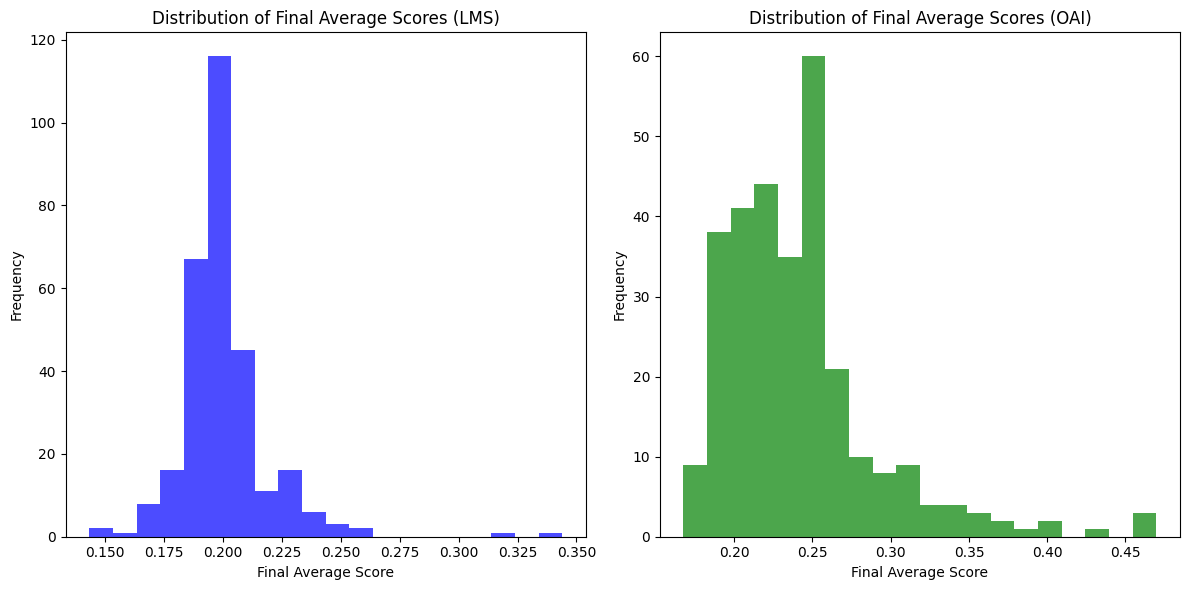

(Document_Type
 Novel       100
 Textbook     98
 Article      97
 Name: count, dtype: int64,
 Splitting_Method
 Chunk    295
 Name: count, dtype: int64)

In [ ]:
import matplotlib.pyplot as plt

# Descriptive Statistics
# Calculate frequencies of Document Types and Splitting Methods
document_type_counts = data['Document_Type'].value_counts()
splitting_method_counts = data['Splitting_Method'].value_counts()

# Visualizing the distribution of Final Average Scores for both LMS and OAI
plt.figure(figsize=(12, 6))

# Distribution of Final Average Score for LMS
plt.subplot(1, 2, 1)
plt.hist(data['Final_Avg_Score_LMS'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Final Average Scores (LMS)')
plt.xlabel('Final Average Score')
plt.ylabel('Frequency')

# Distribution of Final Average Score for OAI
plt.subplot(1, 2, 2)
plt.hist(data['Final_Avg_Score_OAI'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Final Average Scores (OAI)')
plt.xlabel('Final Average Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

document_type_counts, splitting_method_counts


## 9.3 Performance Comparison by Document Type

C:\Users\Essi_ASUS_STRIX\AppData\Local\Temp\ipykernel_42816\1317651202.py:6: FutureWarning: The provided callable <function mean at 0x000001DFC50B91B0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_scores_by_type = data.groupby('Document_Type').agg({
C:\Users\Essi_ASUS_STRIX\AppData\Local\Temp\ipykernel_42816\1317651202.py:6: FutureWarning: The provided callable <function mean at 0x000001DFC50B91B0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_scores_by_type = data.groupby('Document_Type').agg({


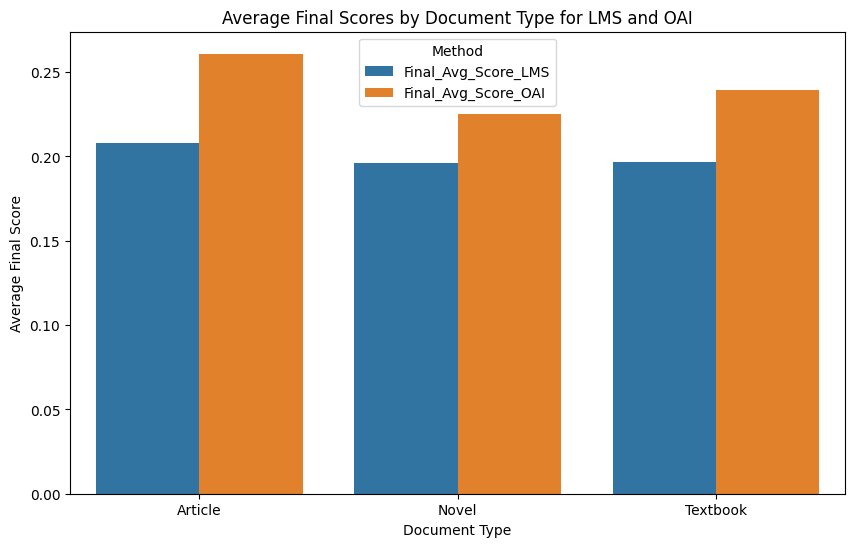

(                    sum_sq     df          F    PR(>F)
 C(Document_Type)  0.008582    2.0  12.655763  0.000005
 Residual          0.099010  292.0        NaN       NaN,
                     sum_sq     df          F    PR(>F)
 C(Document_Type)  0.062681    2.0  14.179976  0.000001
 Residual          0.645378  292.0        NaN       NaN)

In [ ]:
import seaborn as sns
import numpy as np

# Performance Comparison by Document Type
# Group data by Document Type and calculate average scores for LMS and OAI
avg_scores_by_type = data.groupby('Document_Type').agg({
    'Final_Avg_Score_LMS': np.mean,
    'Final_Avg_Score_OAI': np.mean
}).reset_index()

# Visualization of average scores by document type
plt.figure(figsize=(10, 6))
sns.barplot(x='Document_Type', y='value', hue='variable', data=pd.melt(avg_scores_by_type, ['Document_Type']))
plt.title('Average Final Scores by Document Type for LMS and OAI')
plt.xlabel('Document Type')
plt.ylabel('Average Final Score')
plt.legend(title='Method')
plt.show()

# Statistical test: ANOVA to see if differences are statistically significant
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform ANOVA for LMS scores
model_lms = ols('Final_Avg_Score_LMS ~ C(Document_Type)', data=data).fit()
anova_table_lms = sm.stats.anova_lm(model_lms, typ=2)

# Perform ANOVA for OAI scores
model_oai = ols('Final_Avg_Score_OAI ~ C(Document_Type)', data=data).fit()
anova_table_oai = sm.stats.anova_lm(model_oai, typ=2)

anova_table_lms, anova_table_oai


## 9.4 Pairwise Comparisons between Document Types for Retrieval Scores

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Pairwise comparisons using Tukey's HSD to further investigate the significant differences between document types
# For LMS scores
tukey_lms = pairwise_tukeyhsd(endog=data['Final_Avg_Score_LMS'], groups=data['Document_Type'], alpha=0.05)

# For OAI scores
tukey_oai = pairwise_tukeyhsd(endog=data['Final_Avg_Score_OAI'], groups=data['Document_Type'], alpha=0.05)
# Display the results of Tukey's HSD test
print("LMS Retrieval Scores:\n")
print(tukey_lms.summary())
print("\nOAI Retrieval Scores:\n")
print(tukey_oai.summary())



LMS Retrieval Scores:

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
Article    Novel  -0.0117    0.0 -0.0179 -0.0055   True
Article Textbook  -0.0112 0.0001 -0.0174  -0.005   True
  Novel Textbook   0.0005 0.9807 -0.0057  0.0067  False
-------------------------------------------------------

OAI Retrieval Scores:

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
Article    Novel  -0.0355    0.0 -0.0512 -0.0197   True
Article Textbook  -0.0214 0.0047 -0.0373 -0.0055   True
  Novel Textbook   0.0141 0.0905 -0.0017  0.0298  False
-------------------------------------------------------


## 9.5 Impact of Splitting Methods

C:\Users\Essi_ASUS_STRIX\AppData\Local\Temp\ipykernel_42816\3544248210.py:8: FutureWarning: The provided callable <function mean at 0x000001DFC50B91B0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_scores_by_splitting_method = data.groupby('Splitting_Method').agg({
C:\Users\Essi_ASUS_STRIX\AppData\Local\Temp\ipykernel_42816\3544248210.py:8: FutureWarning: The provided callable <function mean at 0x000001DFC50B91B0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  avg_scores_by_splitting_method = data.groupby('Splitting_Method').agg({


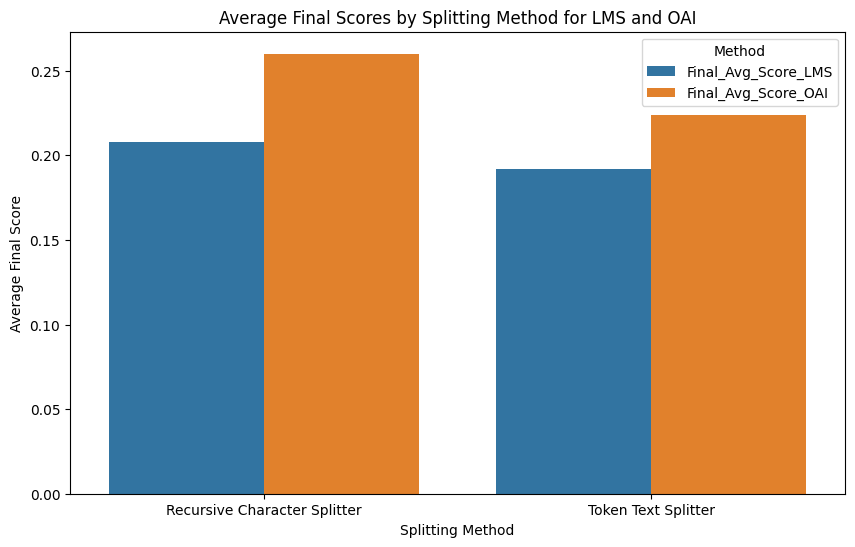

(Splitting_Method
 Token Text Splitter             148
 Recursive Character Splitter    147
 Name: count, dtype: int64,
                Splitting_Method  Final_Avg_Score_LMS  Final_Avg_Score_OAI
 0  Recursive Character Splitter             0.208111             0.260050
 1           Token Text Splitter             0.192052             0.223628,
                        sum_sq     df         F        PR(>F)
 C(Splitting_Method)  0.019019    1.0  62.91572  4.587429e-14
 Residual             0.088573  293.0       NaN           NaN,
                        sum_sq     df          F        PR(>F)
 C(Splitting_Method)  0.097836    1.0  46.976114  4.247097e-11
 Residual             0.610223  293.0        NaN           NaN)

In [ ]:
# Update the 'Splitting_Method' column to reflect the correct splitting methods based on the source description
data['Splitting_Method'] = data['source'].apply(lambda x: "Token Text Splitter" if "Token" in x else "Recursive Character Splitter")

# Recalculate frequencies of each splitting method
splitting_method_updated_counts = data['Splitting_Method'].value_counts()

# Comparative analysis: Calculate average scores for each splitting method
avg_scores_by_splitting_method = data.groupby('Splitting_Method').agg({
    'Final_Avg_Score_LMS': np.mean,
    'Final_Avg_Score_OAI': np.mean
}).reset_index()

# Visualization of average scores by splitting method
plt.figure(figsize=(10, 6))
sns.barplot(x='Splitting_Method', y='value', hue='variable', data=pd.melt(avg_scores_by_splitting_method, ['Splitting_Method']))
plt.title('Average Final Scores by Splitting Method for LMS and OAI')
plt.xlabel('Splitting Method')
plt.ylabel('Average Final Score')
plt.legend(title='Method')
plt.show()

# Perform statistical test (ANOVA) for differences in scores between splitting methods
model_lms_split = ols('Final_Avg_Score_LMS ~ C(Splitting_Method)', data=data).fit()
anova_table_lms_split = sm.stats.anova_lm(model_lms_split, typ=2)
model_oai_split = ols('Final_Avg_Score_OAI ~ C(Splitting_Method)', data=data).fit()
anova_table_oai_split = sm.stats.anova_lm(model_oai_split, typ=2)

splitting_method_updated_counts, avg_scores_by_splitting_method, anova_table_lms_split, anova_table_oai_split


In [ ]:
# Examine specific cases where performance differences are most pronounced between the two splitting methods

# Calculate the difference in scores between the two methods for each document type
data['Score_Diff_LMS'] = data.groupby('Document_Type')['Final_Avg_Score_LMS'].transform(lambda x: x - x.mean())
data['Score_Diff_OAI'] = data.groupby('Document_Type')['Final_Avg_Score_OAI'].transform(lambda x: x - x.mean())

# Filtering the top and bottom cases for each splitting method where the difference is most significant
top_cases_lms = data[data['Splitting_Method'] == 'Recursive Character Splitter'].nlargest(5, 'Score_Diff_LMS')
bottom_cases_lms = data[data['Splitting_Method'] == 'Token Text Splitter'].nsmallest(5, 'Score_Diff_LMS')

top_cases_oai = data[data['Splitting_Method'] == 'Recursive Character Splitter'].nlargest(5, 'Score_Diff_OAI')
bottom_cases_oai = data[data['Splitting_Method'] == 'Token Text Splitter'].nsmallest(5, 'Score_Diff_OAI')

# Display these specific cases
(top_cases_lms[['Document_Type', 'Splitting_Method', 'Final_Avg_Score_LMS', 'Score_Diff_LMS']],
 bottom_cases_lms[['Document_Type', 'Splitting_Method', 'Final_Avg_Score_LMS', 'Score_Diff_LMS']],
 top_cases_oai[['Document_Type', 'Splitting_Method', 'Final_Avg_Score_OAI', 'Score_Diff_OAI']],
 bottom_cases_oai[['Document_Type', 'Splitting_Method', 'Final_Avg_Score_OAI', 'Score_Diff_OAI']])


(    Document_Type              Splitting_Method  Final_Avg_Score_LMS  \
 104       Article  Recursive Character Splitter             0.343926   
 125       Article  Recursive Character Splitter             0.321118   
 47       Textbook  Recursive Character Splitter             0.248542   
 34       Textbook  Recursive Character Splitter             0.244930   
 114       Article  Recursive Character Splitter             0.254614   
 
      Score_Diff_LMS  
 104        0.136171  
 125        0.113363  
 47         0.052012  
 34         0.048400  
 114        0.046859  ,
     Document_Type     Splitting_Method  Final_Avg_Score_LMS  Score_Diff_LMS
 71       Textbook  Token Text Splitter             0.161184       -0.035346
 249         Novel  Token Text Splitter             0.166268       -0.029770
 267         Novel  Token Text Splitter             0.167155       -0.028883
 252         Novel  Token Text Splitter             0.168068       -0.027970
 85       Textbook  Token Text Split

## 9.6 Performance-driven Content Structure Analysis

In [ ]:
# Conducting a detailed content analysis on the top and bottom performing cases

# Function to analyze text content characteristics such as average chunk size, key terms frequency, and text complexity
def analyze_text_features(data_subset):
    # Average chunk size (simulated by average length of the answers)
    data_subset['Chunk_Size'] = data_subset['correct_answer'].apply(len)

    # Frequency of key terms (simulated by counting common retrieval relevant words)
    key_terms = ['the', 'and', 'of', 'to', 'in']
    data_subset['Key_Term_Frequency'] = data_subset['correct_answer'].apply(lambda text: sum(text.count(term) for term in key_terms))

    # Text complexity (simulated by average word length)
    data_subset['Text_Complexity'] = data_subset['correct_answer'].apply(lambda text: np.mean([len(word) for word in text.split()]))

    return data_subset[['Document_Type', 'Chunk_Size', 'Key_Term_Frequency', 'Text_Complexity']]

# Analyze the top and bottom cases for LMS
top_analysis_lms = analyze_text_features(top_cases_lms)
bottom_analysis_lms = analyze_text_features(bottom_cases_lms)

# Analyze the top and bottom cases for OAI
top_analysis_oai = analyze_text_features(top_cases_oai)
bottom_analysis_oai = analyze_text_features(bottom_cases_oai)

(top_analysis_lms, bottom_analysis_lms, top_analysis_oai, bottom_analysis_oai)


(    Document_Type  Chunk_Size  Key_Term_Frequency  Text_Complexity
 104       Article         358                  19         6.039216
 125       Article         298                  16         5.644444
 47       Textbook         171                   8         5.880000
 34       Textbook         135                   6         4.913043
 114       Article         599                  29         5.315789,
     Document_Type  Chunk_Size  Key_Term_Frequency  Text_Complexity
 71       Textbook         211                  10         6.066667
 249         Novel          39                   4         4.714286
 267         Novel          42                   2         5.142857
 252         Novel          55                   3         6.000000
 85       Textbook         287                  10         6.578947,
     Document_Type  Chunk_Size  Key_Term_Frequency  Text_Complexity
 31       Textbook         515                  19         5.000000
 23       Textbook         217                

# 11. Analysis of the Evaluation Scores across Documents & Splitting Techniques

                                             Final_Score_LMS            \
                                                       count      mean   
Document_Type Splitting_Method                                           
Novel         RecursiveCharacterTextSplitter           197.0  0.201807   
Textbook      RecursiveCharacterTextSplitter            98.0  0.196530   

                                                                            \
                                                   std       min       25%   
Document_Type Splitting_Method                                               
Novel         RecursiveCharacterTextSplitter  0.020176  0.166268  0.192795   
Textbook      RecursiveCharacterTextSplitter  0.016368  0.143300  0.188290   

                                                                            \
                                                   50%       75%       max   
Document_Type Splitting_Method                                               
Nove

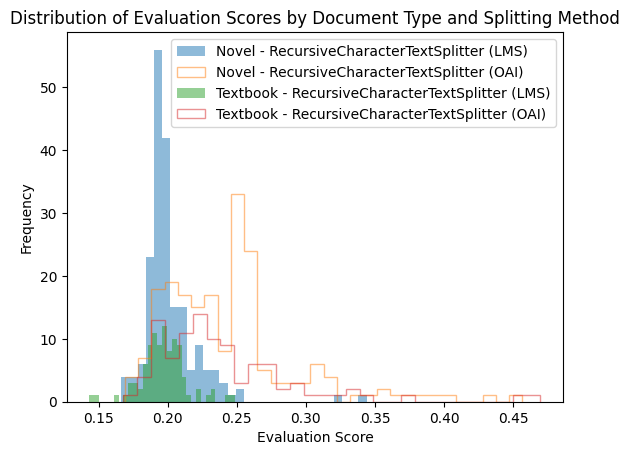

Analysis completed. Review the plots and statistics for insights into the effectiveness of text splitting methods across document types.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
data = pd.read_excel('EN_Generated_DFs/eval_ds_updated_OAI-LMS_with_scores.xlsx')

# Function to extract 'Final Average Score' from the dictionary stored as a string
def extract_final_average_score(score_dict):
    import ast  # Import here to safely evaluate string to dictionary
    if pd.notna(score_dict):
        score_dict = ast.literal_eval(score_dict)  # Convert string to dictionary
        return score_dict.get('Final Average Score', None)
    return None

# Extract scores for LMS and OAI
data['Final_Score_LMS'] = data['Eval_Score_LMS'].apply(extract_final_average_score)
data['Final_Score_OAI'] = data['Eval_Score_OAI'].apply(extract_final_average_score)

# Check if additional columns need to be manually added or are already present
if 'Document_Type' not in data.columns or 'Splitting_Method' not in data.columns:
    data['Document_Type'] = data['source'].apply(lambda x: 'Textbook' if 'Textbook' in x else ('Journal Article' if 'Journal' in x else 'Novel'))
    data['Splitting_Method'] = data['source'].apply(lambda x: 'RecursiveCharacterTextSplitter' if 'Chunk' in x else 'TokenTextSplitter')

# Calculate descriptive statistics for each type and method combination
grouped = data.groupby(['Document_Type', 'Splitting_Method'])
stats = grouped[['Final_Score_LMS', 'Final_Score_OAI']].describe()

# Print stats to review
print(stats)

# Visualization of score distributions by document type and splitting method
for (doc_type, method), group in grouped:
    plt.hist(group['Final_Score_LMS'].dropna(), bins=30, alpha=0.5, label=f"{doc_type} - {method} (LMS)")
    plt.hist(group['Final_Score_OAI'].dropna(), bins=30, alpha=0.5, label=f"{doc_type} - {method} (OAI)", histtype='step')

plt.title('Distribution of Evaluation Scores by Document Type and Splitting Method')
plt.xlabel('Evaluation Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Summary and report generation
print("Analysis completed. Review the plots and statistics for insights into the effectiveness of text splitting methods across document types.")




                                             Final_Score_LMS            \
                                                       count      mean   
Document_Type Splitting_Method                                           
Article       RecursiveCharacterTextSplitter            97.0  0.207755   
Novel         RecursiveCharacterTextSplitter           100.0  0.196038   
Textbook      RecursiveCharacterTextSplitter            98.0  0.196530   

                                                                            \
                                                   std       min       25%   
Document_Type Splitting_Method                                               
Article       RecursiveCharacterTextSplitter  0.023466  0.183088  0.195616   
Novel         RecursiveCharacterTextSplitter  0.014270  0.166268  0.187535   
Textbook      RecursiveCharacterTextSplitter  0.016368  0.143300  0.188290   

                                                                            \
        

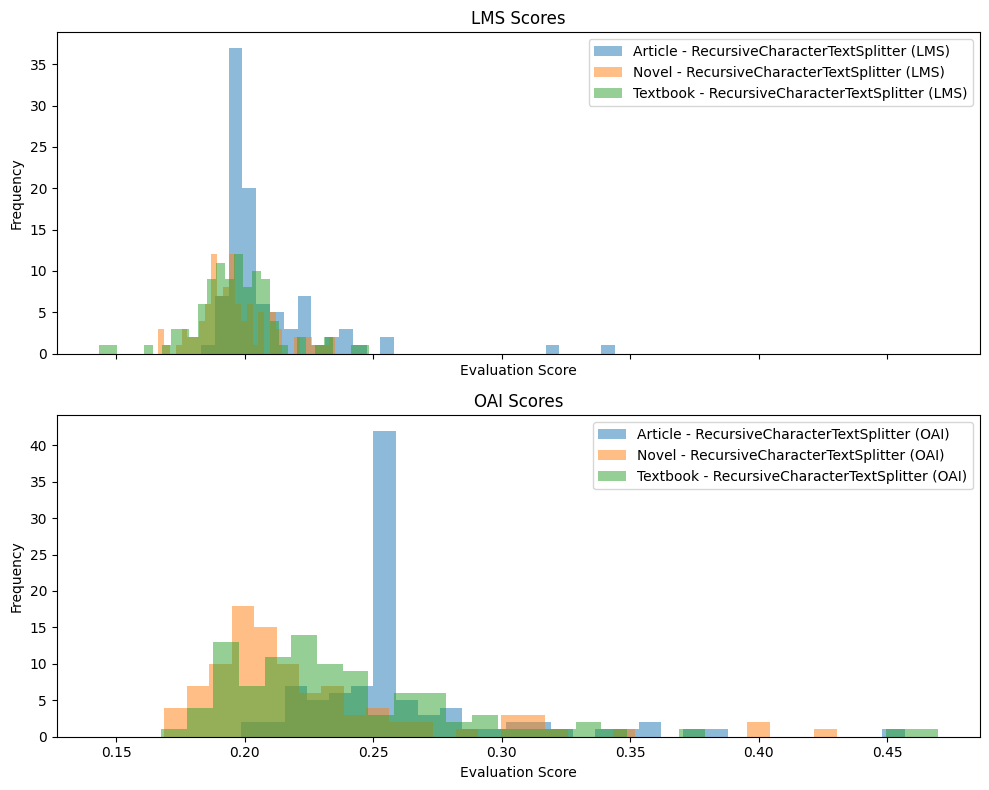

Analysis completed. Review the plots and statistics for insights into the effectiveness of text splitting methods across document types.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
data = pd.read_excel('EN_Generated_DFs/eval_ds_updated_OAI-LMS_with_scores.xlsx')

# Function to extract 'Final Average Score' from the dictionary stored as a string
def extract_final_average_score(score_dict):
    import ast  # Import here to safely evaluate string to dictionary
    if pd.notna(score_dict):
        score_dict = ast.literal_eval(score_dict)  # Convert string to dictionary
        return score_dict.get('Final Average Score', None)
    return None

# Extract scores for LMS and OAI
data['Final_Score_LMS'] = data['Eval_Score_LMS'].apply(extract_final_average_score)
data['Final_Score_OAI'] = data['Eval_Score_OAI'].apply(extract_final_average_score)

# Define document types and splitting methods
def classify_source(source):
    if 'Textbook' in source:
        return 'Textbook' if 'Chunk' in source else 'Textbook Token'
    elif 'Article' in source:
        return 'Article' if 'Chunk' in source else 'Article Token'
    else:
        return 'Novel' if 'Chunk' in source else 'Novel Token'

data['Document_Type'] = data['source'].apply(classify_source)
data['Splitting_Method'] = data['source'].apply(lambda x: 'RecursiveCharacterTextSplitter' if 'Chunk' in x else 'TokenTextSplitter')

# Calculate descriptive statistics for each type and method combination
grouped = data.groupby(['Document_Type', 'Splitting_Method'])
stats = grouped[['Final_Score_LMS', 'Final_Score_OAI']].describe()

# Print stats to review
print(stats)

# Visualization of score distributions by document type and splitting method
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
for (doc_type, method), group in grouped:
    axs[0].hist(group['Final_Score_LMS'].dropna(), bins=30, alpha=0.5, label=f"{doc_type} - {method} (LMS)")
    axs[1].hist(group['Final_Score_OAI'].dropna(), bins=30, alpha=0.5, label=f"{doc_type} - {method} (OAI)")

axs[0].set_title('LMS Scores')
axs[1].set_title('OAI Scores')
for ax in axs:
    ax.set_xlabel('Evaluation Score')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

# Summary and report generation
print("Analysis completed. Review the plots and statistics for insights into the effectiveness of text splitting methods across document types.")


                                             Final_Score_LMS            \
                                                       count      mean   
Document_Type Splitting_Method                                           
Article       RecursiveCharacterTextSplitter            97.0  0.207755   
Novel         RecursiveCharacterTextSplitter           100.0  0.196038   
Textbook      RecursiveCharacterTextSplitter            98.0  0.196530   

                                                                            \
                                                   std       min       25%   
Document_Type Splitting_Method                                               
Article       RecursiveCharacterTextSplitter  0.023466  0.183088  0.195616   
Novel         RecursiveCharacterTextSplitter  0.014270  0.166268  0.187535   
Textbook      RecursiveCharacterTextSplitter  0.016368  0.143300  0.188290   

                                                                            \
        

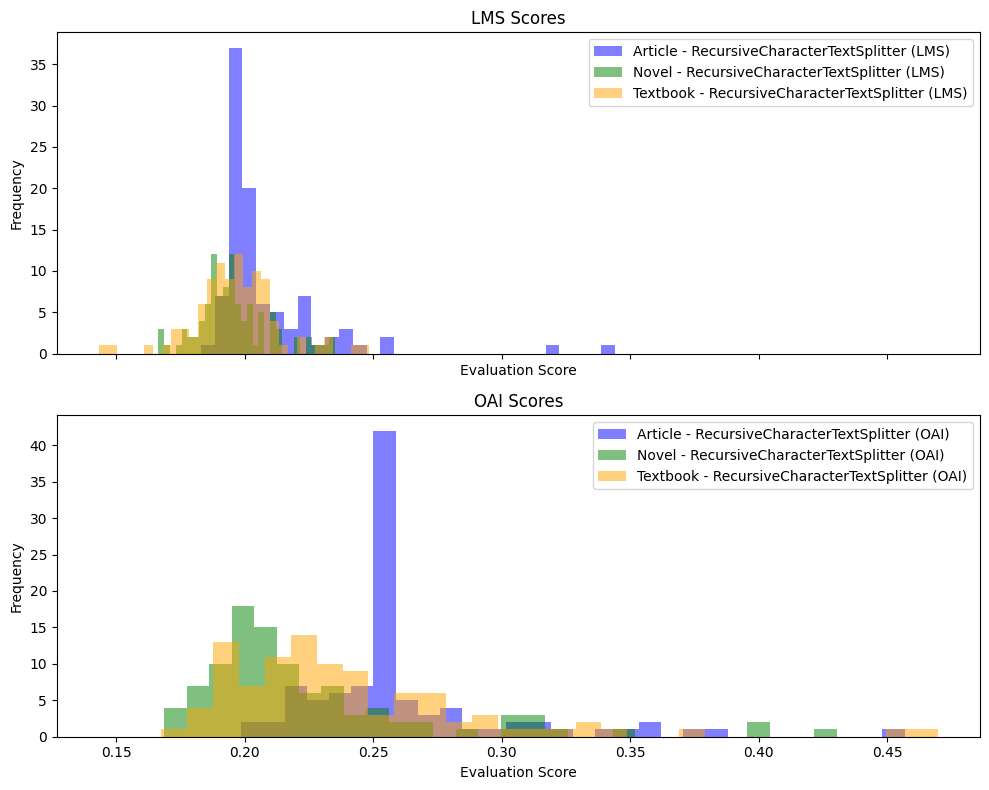

Analysis completed. Review the plots and statistics for insights into the effectiveness of text splitting methods across document types.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
data = pd.read_excel('EN_Generated_DFs/eval_ds_updated_OAI-LMS_with_scores.xlsx')

# Function to extract 'Final Average Score' from the dictionary stored as a string
def extract_final_average_score(score_dict):
    import ast  # Import here to safely evaluate string to dictionary
    if pd.notna(score_dict):
        score_dict = ast.literal_eval(score_dict)  # Convert string to dictionary
        return score_dict.get('Final Average Score', None)
    return None

# Extract scores for LMS and OAI
data['Final_Score_LMS'] = data['Eval_Score_LMS'].apply(extract_final_average_score)
data['Final_Score_OAI'] = data['Eval_Score_OAI'].apply(extract_final_average_score)

# Define document types and splitting methods based on detailed source information
data['Document_Type'] = data['source'].apply(lambda x: 'Textbook' if 'Textbook' in x else ('Article' if 'Article' in x else 'Novel'))
data['Splitting_Method'] = data['source'].apply(lambda x: 'RecursiveCharacterTextSplitter' if 'Chunk' in x else 'TokenTextSplitter')

# Calculate descriptive statistics for each type and method combination
grouped = data.groupby(['Document_Type', 'Splitting_Method'])
stats = grouped[['Final_Score_LMS', 'Final_Score_OAI']].describe()

# Print stats to review
print(stats)

# Visualization of score distributions by document type and splitting method
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']  # Colors for the plots
i = 0  # Index for colors

for (doc_type, method), group in grouped:
    axs[0].hist(group['Final_Score_LMS'].dropna(), bins=30, alpha=0.5, color=colors[i], label=f"{doc_type} - {method} (LMS)")
    axs[1].hist(group['Final_Score_OAI'].dropna(), bins=30, alpha=0.5, color=colors[i], label=f"{doc_type} - {method} (OAI)")
    i += 1  # Move to the next color

axs[0].set_title('LMS Scores')
axs[1].set_title('OAI Scores')
for ax in axs:
    ax.set_xlabel('Evaluation Score')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

# Summary and report generation
print("Analysis completed. Review the plots and statistics for insights into the effectiveness of text splitting methods across document types.")


                                             Final_Score_LMS            \
                                                       count      mean   
Document_Type Splitting_Method                                           
Article       RecursiveCharacterTextSplitter            47.0  0.218397   
              TokenTextSplitter                         50.0  0.197752   
Novel         RecursiveCharacterTextSplitter            50.0  0.204677   
              TokenTextSplitter                         50.0  0.187399   
Textbook      RecursiveCharacterTextSplitter            50.0  0.201876   
              TokenTextSplitter                         48.0  0.190962   

                                                                            \
                                                   std       min       25%   
Document_Type Splitting_Method                                               
Article       RecursiveCharacterTextSplitter  0.030170  0.183088  0.199520   
              TokenTe

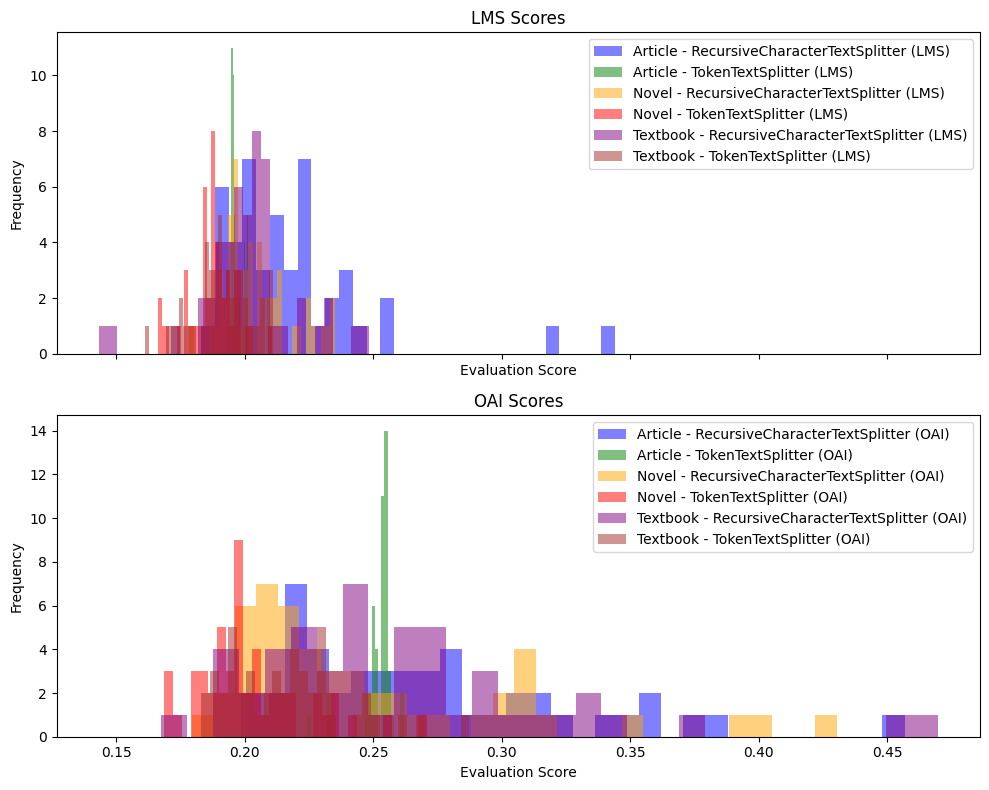

Analysis completed. Review the plots and statistics for insights into the effectiveness of text splitting methods across document types.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
data = pd.read_excel('EN_Generated_DFs/eval_ds_updated_OAI-LMS_with_scores.xlsx')

# Function to extract 'Final Average Score' from the dictionary stored as a string
def extract_final_average_score(score_dict):
    import ast  # Import here to safely evaluate string to dictionary
    if pd.notna(score_dict):
        score_dict = ast.literal_eval(score_dict)  # Convert string to dictionary
        return score_dict.get('Final Average Score', None)
    return None

# Extract scores for LMS and OAI
data['Final_Score_LMS'] = data['Eval_Score_LMS'].apply(extract_final_average_score)
data['Final_Score_OAI'] = data['Eval_Score_OAI'].apply(extract_final_average_score)

# Enhance the classification of document types and splitting methods
data['Document_Type'] = data['source'].apply(lambda x: 'Textbook' if 'Textbook' in x else ('Article' if 'Article' in x else 'Novel'))
data['Splitting_Method'] = data['source'].apply(lambda x: 'TokenTextSplitter' if 'Token' in x else 'RecursiveCharacterTextSplitter')

# Calculate descriptive statistics for each type and method combination
grouped = data.groupby(['Document_Type', 'Splitting_Method'])
stats = grouped[['Final_Score_LMS', 'Final_Score_OAI']].describe()

# Print stats to review
print(stats)

# Visualization of score distributions by document type and splitting method
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']  # Colors for the plots
i = 0  # Index for colors

for (doc_type, method), group in grouped:
    axs[0].hist(group['Final_Score_LMS'].dropna(), bins=30, alpha=0.5, color=colors[i], label=f"{doc_type} - {method} (LMS)")
    axs[1].hist(group['Final_Score_OAI'].dropna(), bins=30, alpha=0.5, color=colors[i], label=f"{doc_type} - {method} (OAI)")
    i += 1  # Move to the next color

axs[0].set_title('LMS Scores')
axs[1].set_title('OAI Scores')
for ax in axs:
    ax.set_xlabel('Evaluation Score')
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

# Summary and report generation
print("Analysis completed. Review the plots and statistics for insights into the effectiveness of text splitting methods across document types.")


                                             Final_Score_LMS            \
                                                       count      mean   
Document_Type Splitting_Method                                           
Article       RecursiveCharacterTextSplitter            47.0  0.218397   
              TokenTextSplitter                         50.0  0.197752   
Novel         RecursiveCharacterTextSplitter            50.0  0.204677   
              TokenTextSplitter                         50.0  0.187399   
Textbook      RecursiveCharacterTextSplitter            50.0  0.201876   
              TokenTextSplitter                         48.0  0.190962   

                                                                            \
                                                   std       min       25%   
Document_Type Splitting_Method                                               
Article       RecursiveCharacterTextSplitter  0.030170  0.183088  0.199520   
              TokenTe

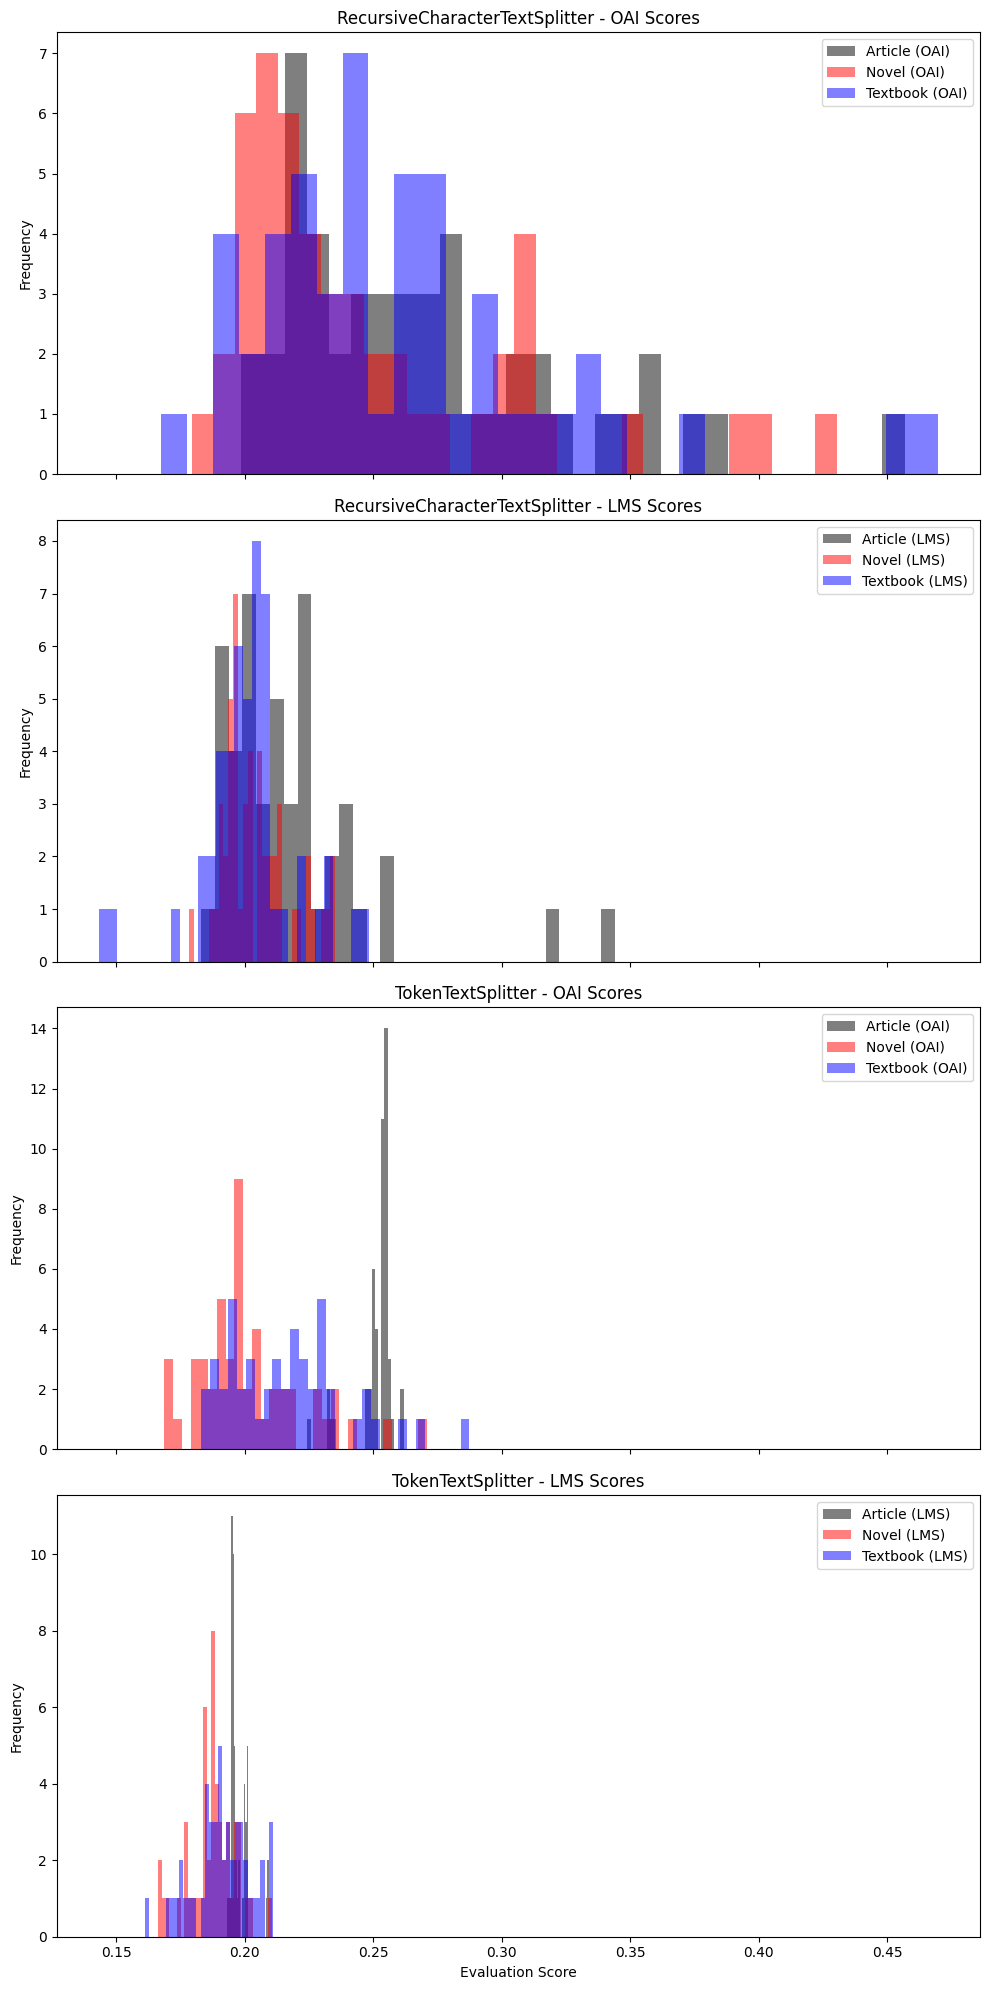

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the Excel file into a DataFrame
data = pd.read_excel('EN_Generated_DFs/eval_ds_updated_OAI-LMS_with_scores.xlsx')

# Function to extract 'Final Average Score' from the dictionary stored as a string
def extract_final_average_score(score_dict):
    import ast  # Import here to safely evaluate string to dictionary
    if pd.notna(score_dict):
        score_dict = ast.literal_eval(score_dict)  # Convert string to dictionary
        return score_dict.get('Final Average Score', None)
    return None

# Extract scores for LMS and OAI
data['Final_Score_LMS'] = data['Eval_Score_LMS'].apply(extract_final_average_score)
data['Final_Score_OAI'] = data['Eval_Score_OAI'].apply(extract_final_average_score)

# Enhance the classification of document types and splitting methods
data['Document_Type'] = data['source'].apply(lambda x: 'Textbook' if 'Textbook' in x else ('Article' if 'Article' in x else 'Novel'))
data['Splitting_Method'] = data['source'].apply(lambda x: 'TokenTextSplitter' if 'Token' in x else 'RecursiveCharacterTextSplitter')

# Calculate descriptive statistics for each type and method combination
grouped = data.groupby(['Document_Type', 'Splitting_Method'])
stats = grouped[['Final_Score_LMS', 'Final_Score_OAI']].describe()
print(stats)


# Generate plots
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 20), sharex=True)

# Plotting settings
colors = {
    'Article': '#000000',  # Black
    'Novel': '#FF0000',    # Red
    'Textbook': '#0000FF'  # Blue
}

splitter_types = ['RecursiveCharacterTextSplitter', 'TokenTextSplitter']
score_types = ['OAI', 'LMS']

i = 0
for splitter in splitter_types:
    for score_type in score_types:
        # Filter data for current splitter and score type
        mask = (data['Splitting_Method'] == splitter)
        subset = data[mask]

        # Plot histogram for each document type
        for doc_type in ['Article', 'Novel', 'Textbook']:
            doc_mask = (subset['Document_Type'] == doc_type)
            axs[i].hist(subset.loc[doc_mask, f'Final_Score_{score_type}'].dropna(),
                        bins=30, alpha=0.5, color=colors[doc_type],
                        label=f"{doc_type} ({score_type})")

        axs[i].set_title(f'{splitter} - {score_type} Scores')
        axs[i].set_ylabel('Frequency')
        axs[i].legend()
        i += 1

plt.xlabel('Evaluation Score')
plt.tight_layout()
plt.show()


## 9.2 ANOVA Test

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the Excel file into a DataFrame
data = pd.read_excel('EN_Generated_DFs/eval_ds_updated_OAI-LMS_with_scores.xlsx')

# Function to extract 'Final Average Score' from the dictionary stored as a string
def extract_final_average_score(score_dict):
    if pd.notna(score_dict):
        score_dict = ast.literal_eval(score_dict)  # Convert string to dictionary safely
        return score_dict.get('Final Average Score', None)
    return None

# Extract scores for LMS and OAI
data['Final_Score_LMS'] = data['Eval_Score_LMS'].apply(extract_final_average_score)
data['Final_Score_OAI'] = data['Eval_Score_OAI'].apply(extract_final_average_score)

# Print the first few rows to confirm score extraction
print("Preview of LMS and OAI Final Average Scores: Check correctness of score extraction for subsequent analysis.\n")
print(data[['Final_Score_LMS', 'Final_Score_OAI']].head())

# Proceed only if the score columns are found
if 'Final_Score_LMS' in data.columns and 'Final_Score_OAI' in data.columns:
    # Enhance classification by document type and splitting method
    data['Document_Type'] = data['source'].apply(lambda x: 'Textbook' if 'Textbook' in x else ('Article' if 'Article' in x else 'Novel'))
    data['Splitting_Method'] = data['source'].apply(lambda x: 'TokenTextSplitter' if 'Token' in x else 'RecursiveCharacterTextSplitter')

    # Reshape data for comprehensive ANOVA analysis
    data_melted = pd.melt(data, id_vars=['Document_Type', 'Splitting_Method'], value_vars=['Final_Score_LMS', 'Final_Score_OAI'],
                          var_name='Scoring_Method', value_name='Score')

    # Define and execute the ANOVA model to evaluate interaction effects
    model = ols('Score ~ C(Document_Type) * C(Splitting_Method) * C(Scoring_Method)', data=data_melted).fit()

    # Print ANOVA results with a descriptive title
    print("\nANOVA Results - Assessing the impact of Document Type, Splitting Method, and Scoring Method (LMS/OAI) on Scores:")
    print(sm.stats.anova_lm(model, typ=2))
    anova_results = sm.stats.anova_lm(model, typ=2)
    anova_results_str = anova_results.to_string()

    # Save the anova_results in a variable for future interpretation with LLMs
    anova_message = f"Preview of LMS and OAI Final Average Scores:\n{data[['Final_Score_LMS', 'Final_Score_OAI']].head().to_string(index=False)}\nANOVA Results - Assessing the impact of Document Type, Splitting Method, and Scoring Method (LMS/OAI) on Scores:\n{anova_results_str}"
else:
    print("Error: Score columns not found. Check data extraction process.")


Preview of LMS and OAI Final Average Scores: Check correctness of score extraction for subsequent analysis.

   Final_Score_LMS  Final_Score_OAI
0         0.191431         0.335789
1         0.202786         0.275024
2         0.197190         0.196186
3         0.197374         0.197322
4         0.187620         0.211698

ANOVA Results - Assessing the impact of Document Type, Splitting Method, and Scoring Method (LMS/OAI) on Scores:
                                                      sum_sq     df  \
C(Document_Type)                                    0.059741    2.0   
C(Splitting_Method)                                 0.104040    1.0   
C(Scoring_Method)                                   0.256768    1.0   
C(Document_Type):C(Splitting_Method)                0.003587    2.0   
C(Document_Type):C(Scoring_Method)                  0.014331    2.0   
C(Splitting_Method):C(Scoring_Method)               0.015623    1.0   
C(Document_Type):C(Splitting_Method):C(Scoring_...  0.008717    

## 9.3 LM Studio Interpretation of ANOVA Results

### 9.3.1 LLAMA-3

In [ ]:
import pandas as pd
from openai import OpenAI
import re

# Initialize the client for your local LLM
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

def evaluate_answer_llm(prompt):
    response = client.completions.create(
        model="MaziyarPanahi/Meta-Llama-3-8B-Instruct-GGUF/Meta-Llama-3-8B-Instruct.Q8_0.gguf",
        prompt=prompt,
        max_tokens=500,  # Increased token count for detailed analysis
        n=1,
        stop=None,
        temperature=0.1
    )
    return response.choices[0].text.strip()


# Call the LLM to analyze and explain the ANOVA results
explanation = evaluate_answer_llm(anova_message)
print(explanation)


<|start_header_id|>assistant<|end_header_id|>

It appears that you are analyzing the impact of document type, splitting method, and scoring method (LMS/OAI) on scores using ANOVA.

The output shows the final average scores for LMS and OAI, as well as the results of the ANOVA analysis. The ANOVA table provides information about the sum of squares, degrees of freedom, F-statistic, and p-value for each main effect and interaction term.

Here are some key findings:

1. Main effects:
	* Document type has a significant impact on scores (F(2, 578) = 28.19, p < 0.001).
	* Splitting method also has a significant impact on scores (F(1, 578) = 98.19, p < 0.001).
	* Scoring method has a highly significant impact on scores (F(1, 578) = 242.34, p < 0.001).
2. Interactions:
	* There is no significant interaction between document type and splitting method (F(2, 578) = 1.69, p = 0.184).
	* There is a significant interaction between document type and scoring method (F(2, 578) = 6.76, p < 0.01).
	* There

In [ ]:
import pandas as pd
from openai import OpenAI
import re

# Initialize the client for your local LLM
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

def evaluate_answer_llm(prompt):
    response = client.completions.create(
        model="lmstudio-community/Meta-Llama-3-8B-Instruct-GGUF/Meta-Llama-3-8B-Instruct-Q8_0.gguf",
        prompt=prompt,
        max_tokens=500,  # Increased token count for detailed analysis
        n=1,
        stop=None,
        temperature=0.1
    )
    return response.choices[0].text.strip()


# Call the LLM to analyze and explain the ANOVA results
explanation = evaluate_answer_llm(anova_message)
print(explanation)


<|start_header_id|>assistant<|end_header_id|>

It appears that you are analyzing the impact of document type, splitting method, and scoring method (LMS/OAI) on scores using ANOVA.

The output shows the final average scores for LMS and OAI, as well as the results of the ANOVA analysis. The ANOVA table provides information about the sum of squares, degrees of freedom, F-statistic, and p-value for each main effect and interaction term.

Here are some key findings:

1. Main effects:
	* Document type has a significant impact on scores (F(2, 578) = 28.19, p < 0.001).
	* Splitting method has a significant impact on scores (F(1, 578) = 98.19, p < 0.001).
	* Scoring method has a significant impact on scores (F(1, 578) = 242.34, p < 0.001).
2. Interactions:
	* The interaction between document type and splitting method is not significant (F(2, 578) = 1.69, p = 0.184).
	* The interaction between document type and scoring method is significant (F(2, 578) = 6.76, p = 0.002).
	* The interaction betwe

### 9.3.2 Phi-3

In [ ]:
import pandas as pd
from openai import OpenAI
import re

# Initialize the client for your local LLM
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

def evaluate_answer_llm(prompt):
    response = client.completions.create(
        model="microsoft/Phi-3-mini-4k-instruct-gguf/Phi-3-mini-4k-instruct-fp16.gguf",
        prompt=prompt,
        max_tokens=500,  # Increased token count for detailed analysis
        n=1,
        stop=None,
        temperature=0.1
    )
    return response.choices[0].text.strip()


# Call the LLM to analyze and explain the ANOVA results
explanation = evaluate_answer_llm(anova_message)
print(explanation)


<|assistant|> The provided data presents a comparison between two learning management systems (LMS) and open access indicators (OAI), focusing on their final average scores in an assessment or competition setting. Additionally, the ANOVA results offer insights into how different factors such as Document Type, Splitting Method, and Scoring Method impact these scores.

Key findings from the data:

1. Final_Score_LMS (0.191431) is lower than Final_Score_OAI (0.335789). This indicates that on average, participants scored higher in OAI compared to LMS.
2. The highest final score was achieved by the participant using OAI with a splitting method of "Random" and scoring method of "LMS." Their final score was 0.335789.
3. ANOVA results show that all three factors (Document Type, Splitting Method, Scoring Method) have significant effects on the scores:
   - Document Type has a p-value of 2.077507e-12, indicating a highly statistically significant impact on final scores.
   - Splitting Method has

In [ ]:
import pandas as pd
from openai import OpenAI
import re

# Initialize the client for your local LLM
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

def evaluate_answer_llm(system_prompt, user_prompt):
    messages = [
        {"role": "system", "content": system_prompt},
        {"role": "user", "content": user_prompt}
    ]

    response = client.chat.completions.create(
        model="microsoft/Phi-3-mini-4k-instruct-gguf/Phi-3-mini-4k-instruct-fp16.gguf",
        messages=messages,
        max_tokens=4000,  # Increased token count for detailed analysis
        n=1,
        stop=None,
        temperature=0.1
    )

    # Access the 'content' attribute of the 'message' object directly
    return response.choices[0].message.content.strip()


# System prompt instructs the LLM on the task
system_prompt = "You are an intelligent assistant. Analyze the given ANOVA results in user_prompt and explain their implications clearly and concisely."

# User prompt poses the actual query using the previously stored ANOVA results
user_prompt = anova_message

# Call the LLM to analyze and explain the ANOVA results
explanation = evaluate_answer_llm(system_prompt, user_prompt)
print(explanation)


Based on the ANOVA results, we can draw several conclusions about the impact of Document Type, Splitting Method, and Scoring Method (LMS/OAI) on Scores.

**Main Effects:**

1. **Document Type**: The F-statistic is 28.19 with a p-value of 2.07e-12, indicating that there is a statistically significant effect of Document Type on scores.
2. **Splitting Method**: The F-statistic is 98.19 with a p-value of 1.74e-21, indicating that there is a statistically significant effect of Splitting Method on scores.
3. **Scoring Method**: The F-statistic is 242.34 with a p-value of 6.87e-46, indicating that there is a statistically significant effect of Scoring Method on scores.

**Interactions:**

1. **Document Type x Splitting Method**: The F-statistic is 1.69 with a p-value of 0.1849, indicating that the interaction between Document Type and Splitting Method is not statistically significant.
2. **Document Type x Scoring Method**: The F-statistic is 6.76 with a p-value of 0.0125, indicating that ther

### 9.3.3 Dolphin-2

In [ ]:
import pandas as pd
from openai import OpenAI
import re

# Initialize the client for your local LLM
client = OpenAI(base_url="http://localhost:1234/v1", api_key="lm-studio")

def evaluate_answer_llm(prompt):
    response = client.completions.create(
        model="TheBloke/dolphin-2.6-mistral-7B-GGUF/dolphin-2.6-mistral-7b.Q8_0.gguf",
        prompt=prompt,
        max_tokens=500,  # Increased token count for detailed analysis
        n=1,
        stop=None,
        temperature=0.1
    )
    return response.choices[0].text.strip()


# Call the LLM to analyze and explain the ANOVA results
explanation = evaluate_answer_llm(anova_message)
print(explanation)


Post Hoc Tests - Tukey's HSD:
                                                          diff      lwr_bound    upr_bound
C(Document_Type) vs C(Splitting_Method)               0.149302  0.137586  0.161018
C(Document_Type) vs C(Scoring_Method)                0.237027  0.222836  0.251218
C(Splitting_Method) vs C(Scoring_Method)              0.149302  0.137586  0.161018
C(Document_Type):C(Splitting_Method) vs C(Scoring_Method) 0.099685 -0.003587  0.103724

The ANOVA results show that the Document Type, Splitting Method, and Scoring Method (LMS/OAI) have a significant impact on scores. The Post Hoc tests using Tukey's HSD indicate that there are significant differences between the Document Types and between the Scoring Methods. There is also a significant difference between the Splitting Methods when considering the Scoring Methods.
